In [70]:
#include the necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [71]:
#more essential modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score) 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
#read dataset
data_csv=pd.read_csv("sub1dataset.csv") 
data_csv=data_csv.iloc[:,2:len(data_csv.columns)]

In [73]:
#read labels
label_csv=pd.read_csv("sub1factors.csv")
label_csv=label_csv.iloc[:,2:len(label_csv.columns)]

In [74]:
#separate train and test data
train_x, test_x, train_y, test_y=train_test_split(data_csv,label_csv,test_size=0.2,random_state=0)

In [75]:
test_y_sort=sorted(test_y.index) 
test_y_sort=test_y.sort_index() 
print(train_y)
print(test_y_sort) 

       MeanF1   MeanF2  MeanF3
3903  1.71429  3.66667       2
261   2.57143  3.66667       4
3231  2.28571  3.66667       5
3541  2.28571  3.66667       5
4582  3.85714  3.66667       3
...       ...      ...     ...
4931  3.85714  4.66667       3
3264  2.28571  3.66667       5
1653  2.42857  3.00000       3
2607  2.00000  3.66667       2
2732  2.00000  3.66667       2

[4271 rows x 3 columns]
       MeanF1   MeanF2  MeanF3
4     2.57143  3.66667       4
9     2.57143  3.66667       4
12    2.57143  3.66667       4
14    2.57143  3.66667       4
15    2.57143  3.66667       4
...       ...      ...     ...
5291  3.85714  4.66667       3
5293  3.85714  4.66667       3
5299  3.85714  4.66667       3
5321  3.85714  4.66667       3
5333  3.85714  4.66667       3

[1068 rows x 3 columns]


In [76]:
train_y=train_y.iloc[:,2:3] 
test_y=test_y.iloc[:,2:3] 
print(train_y) 
print(test_y)

      MeanF3
3903       2
261        4
3231       5
3541       5
4582       3
...      ...
4931       3
3264       5
1653       3
2607       2
2732       2

[4271 rows x 1 columns]
      MeanF3
4610       3
3135       2
4154       2
1837       3
4468       3
...      ...
1593       3
3100       2
1180       5
3972       2
1520       5

[1068 rows x 1 columns]


In [77]:
#学習
clf =RandomForestClassifier(random_state=0,min_samples_leaf=5,n_estimators=100) 
clf = clf.fit(train_x, train_y.values.ravel())
#評価
pred_train1=clf.predict(train_x)
pred1 = clf.predict(test_x)
print("test:",accuracy_score(pred1, test_y))
print("train:",accuracy_score(pred_train1, train_y))

test: 0.6853932584269663
train: 0.9592601264340904


In [78]:
CM=confusion_matrix(test_y, clf.predict(test_x)) 
print(CM)

[[117  67   6  37]
 [ 17 222  12  77]
 [  3   4 161  27]
 [  8  54  24 232]]


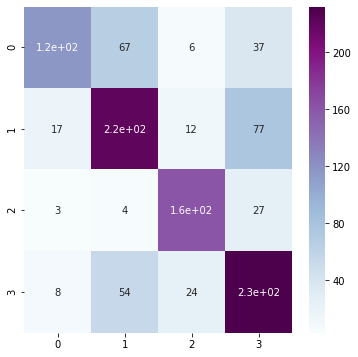

In [80]:
#ヒートマップ化 
fig, ax = plt.subplots(figsize=(6, 6))
svm=sns.heatmap(CM,annot=True,cmap='BuPu')
ax.set_ylim(len(CM), 0)
figure = svm.get_figure()    
figure.savefig('factor3HM.png', dpi=400)

In [81]:
#重要度の確認
train_x=pd.DataFrame(train_x)
importance = pd.DataFrame({ 'variables' :train_x.columns, 'importance' :clf.feature_importances_}) 
importance = importance.sort_values('importance',ascending=False) 
importance = importance.reset_index(drop=True)
importance.index = np.arange(1, len(importance) + 1)
importance.to_csv("sub1_factor3_importance.csv")
importance

,variables,importance
1,Channel 3 - Channel 12 b Waves,0.141805
2,Channel 3 - Channel 12 a Waves,0.126873
3,Pupil Average Diameter,0.066243
4,Change in R-R Interval,0.061307
5,Channel 4 - Channel 11 b Waves,0.050707
6,Channel 4 - Channel 11 a Waves,0.047552
7,Channel 2 - Channel 13 a Waves,0.027065
8,Channel 1 - Channel 14 a Waves,0.026873
9,Channel 6 - Channel 9 a Waves,0.023234
10,Channel 1 - Channel 14 b Waves,0.021952


In [82]:
#read dataset
data_csv=pd.read_csv("sub1dataset.csv") 
data_csv=data_csv.iloc[:,2:len(data_csv.columns)]

In [83]:
#read labels
label_csv=pd.read_csv("sub1factors.csv")
label_csv=label_csv.iloc[:,2:len(label_csv.columns)]

In [84]:
label_csv2 = label_csv.iloc[:,1:2]
label_csv2

,MeanF2
0,3.66667
1,3.66667
2,3.66667
3,3.66667
4,3.66667
...,...
5334,4.66667
5335,4.66667
5336,4.66667
5337,4.66667


In [85]:
#create a list of values in dataframe
specific = []
for value in label_csv2.values:
    specific.append(float(value))

In [86]:
#create a dictionary
value_dict = {}
value_list = pd.unique(label_csv2['MeanF2'])
for num in range(0, len(value_list)):
    value_dict[value_list[num]] = num

In [87]:
value_dict

{3.66667: 0, 2.33333: 1, 3.0: 2, 4.66667: 3}

In [88]:
specific2= []
for value in specific:
    specific2.append(value_dict[value])

In [89]:
specific2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [90]:
label_csv = pd.DataFrame(specific2) 
label_csv

,0
0,0
1,0
2,0
3,0
4,0
...,...
5334,3
5335,3
5336,3
5337,3


In [91]:
#separate train and test data
train_x, test_x, train_y, test_y=train_test_split(data_csv,label_csv,test_size=0.2,random_state=0)

In [92]:
test_y_sort=sorted(test_y.index) 
test_y_sort=test_y.sort_index() 
print(train_y)
print(test_y_sort) 

      0
3903  0
261   0
3231  0
3541  0
4582  0
...  ..
4931  3
3264  0
1653  2
2607  0
2732  0

[4271 rows x 1 columns]
      0
4     0
9     0
12    0
14    0
15    0
...  ..
5291  3
5293  3
5299  3
5321  3
5333  3

[1068 rows x 1 columns]


In [93]:
print(train_y) 
print(test_y)

      0
3903  0
261   0
3231  0
3541  0
4582  0
...  ..
4931  3
3264  0
1653  2
2607  0
2732  0

[4271 rows x 1 columns]
      0
4610  0
3135  0
4154  0
1837  2
4468  0
...  ..
1593  2
3100  0
1180  0
3972  0
1520  0

[1068 rows x 1 columns]


In [94]:
#学習
clf = RandomForestClassifier(random_state=0,min_samples_leaf=5,n_estimators=100) 
clf = clf.fit(train_x, train_y.values.ravel())
#評価
pred_train1=clf.predict(train_x)
pred1 = clf.predict(test_x)
print("test:",accuracy_score(pred1, test_y))
print("train:",accuracy_score(pred_train1, train_y))

test: 0.704119850187266
train: 0.9025989229688598


In [95]:
#正解の内訳
CM=confusion_matrix(test_y, clf.predict(test_x)) 
print(CM)

[[677  12   3   2]
 [113  47   1   1]
 [102   2  16   0]
 [ 80   0   0  12]]


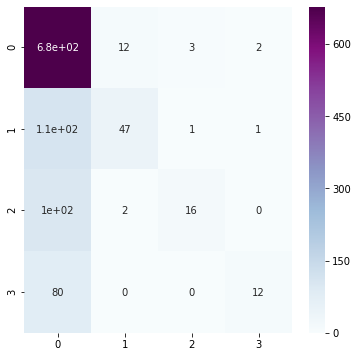

In [96]:
#ヒートマップ化 
fig, ax = plt.subplots(figsize=(6, 6))
svm=sns.heatmap(CM,annot=True,cmap='BuPu')
ax.set_ylim(len(CM), 0)
figure = svm.get_figure()    
figure.savefig('factor2HM.png', dpi=400)

In [97]:
#重要度の確認
train_x=pd.DataFrame(train_x)
importance = pd.DataFrame({ 'variables' :train_x.columns, 'importance' :clf.feature_importances_}) 
importance = importance.sort_values('importance',ascending=False) 
importance = importance.reset_index(drop=True)
importance.index = np.arange(1, len(importance) + 1)
importance.to_csv("sub1_factor2_importance.csv")
importance

,variables,importance
1,Channel 3 - Channel 12 b Waves,0.084639
2,Channel 3 - Channel 12 a Waves,0.070355
3,Change in R-R Interval,0.069671
4,Pupil Average Diameter,0.048740
5,Channel 4 - Channel 11 b Waves,0.048227
6,Channel 4 - Channel 11 a Waves,0.047371
7,Channel 1 - Channel 14 a Waves,0.042780
8,Channel 1 - Channel 14 b Waves,0.037555
9,Channel 5 - Channel 10 b Waves,0.026267
10,Channel 7 - Channel 8 b Waves,0.024420


In [98]:
#read dataset
data_csv=pd.read_csv("sub1dataset.csv") 
data_csv=data_csv.iloc[:,2:len(data_csv.columns)]

In [99]:
#read labels
label_csv=pd.read_csv("sub1factors.csv")
label_csv=label_csv.iloc[:,2:len(label_csv.columns)]

In [100]:
label_csv2 = label_csv.iloc[:,0:1]
label_csv2

,MeanF1
0,2.57143
1,2.57143
2,2.57143
3,2.57143
4,2.57143
...,...
5334,3.85714
5335,3.85714
5336,3.85714
5337,3.85714


In [101]:
#create a list of values in dataframe
specific = []
for value in label_csv2.values:
    specific.append(float(value))

In [102]:
#create a dictionary
value_dict = {}
value_list = pd.unique(label_csv2['MeanF1'])
for num in range(0, len(value_list)):
    value_dict[value_list[num]] = num

In [103]:
value_dict

{2.57143: 0,
 2.0: 1,
 3.1428599999999998: 2,
 2.42857: 3,
 2.8571400000000002: 4,
 2.28571: 5,
 1.71429: 6,
 3.8571400000000002: 7}

In [104]:
#create a new list for new dataframe
specific2= []
for value in specific:
    specific2.append(value_dict[value])

In [105]:
label_csv = pd.DataFrame(specific2) 
label_csv

,0
0,0
1,0
2,0
3,0
4,0
...,...
5334,7
5335,7
5336,7
5337,7


In [106]:
#separate train and test data
train_x, test_x, train_y, test_y=train_test_split(data_csv,label_csv,test_size=0.2,random_state=0)

In [107]:
test_y_sort=sorted(test_y.index) 
test_y_sort=test_y.sort_index() 
print(train_y)
print(test_y_sort) 

      0
3903  6
261   0
3231  5
3541  5
4582  7
...  ..
4931  7
3264  5
1653  3
2607  1
2732  1

[4271 rows x 1 columns]
      0
4     0
9     0
12    0
14    0
15    0
...  ..
5291  7
5293  7
5299  7
5321  7
5333  7

[1068 rows x 1 columns]


In [108]:
print(train_y) 
print(test_y)

      0
3903  6
261   0
3231  5
3541  5
4582  7
...  ..
4931  7
3264  5
1653  3
2607  1
2732  1

[4271 rows x 1 columns]
      0
4610  7
3135  1
4154  6
1837  3
4468  7
...  ..
1593  3
3100  1
1180  2
3972  6
1520  2

[1068 rows x 1 columns]


In [109]:
#学習
clf = RandomForestClassifier(random_state=0,min_samples_leaf=5,n_estimators=100) 
clf = clf.fit(train_x, train_y.values.ravel())
#評価
pred_train1=clf.predict(train_x)
pred1 = clf.predict(test_x)
print("test:",accuracy_score(pred1, test_y))
print("train:",accuracy_score(pred_train1, train_y))

test: 0.6404494382022472
train: 0.9555139311636619


In [110]:
#正解の内訳
CM=confusion_matrix(test_y, clf.predict(test_x)) 
print(CM)

[[100   3  11   9   0   0   0   1]
 [  9 165   7   2   1   2   1   2]
 [ 12  19  56  13   7   1   0   4]
 [ 18  11  15  67   4   4   0   1]
 [  0  12  13  10  41   6   2   7]
 [  0   7   3   3   5  57   3  37]
 [  0   6   0   0   1  15  10  77]
 [  0   7   1   0   0   9   3 188]]


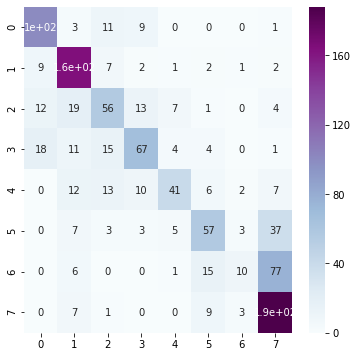

In [111]:
#ヒートマップ化 
fig, ax = plt.subplots(figsize=(6, 6))
svm=sns.heatmap(CM,annot=True,cmap='BuPu')
ax.set_ylim(len(CM), 0)
figure = svm.get_figure()    
figure.savefig('factor1HM.png', dpi=400)

In [112]:
#重要度の確認
train_x=pd.DataFrame(train_x)
importance = pd.DataFrame({ 'variables' :train_x.columns, 'importance' :clf.feature_importances_}) 
importance = importance.sort_values('importance',ascending=False) 
importance = importance.reset_index(drop=True)
importance.index = np.arange(1, len(importance) + 1)
importance.to_csv("sub1_factor1_importance.csv")
importance

,variables,importance
1,Channel 3 - Channel 12 b Waves,0.136663
2,Channel 3 - Channel 12 a Waves,0.111720
3,Change in R-R Interval,0.099023
4,Pupil Average Diameter,0.075232
5,Channel 4 - Channel 11 b Waves,0.047371
6,Channel 4 - Channel 11 a Waves,0.039186
7,Channel 1 - Channel 14 a Waves,0.029445
8,Channel 1 - Channel 14 b Waves,0.028378
9,Channel 7 - Channel 8 b Waves,0.027499
10,Channel 6 - Channel 9 a Waves,0.022585


In [113]:
#read dataset
data_csv=pd.read_csv("sub1dataset.csv") 
data_csv=data_csv.iloc[:,2:len(data_csv.columns)]

In [114]:
#read labels
label_csv=pd.read_csv("sub1labels.csv")
label_csv=label_csv.iloc[:,2:len(label_csv.columns)]

3903    4
261     2
3231    4
3541    4
4582    2
       ..
4931    4
3264    4
1653    1
2607    1
2732    1
Name: Like, Length: 4271, dtype: int64
4610    2
3135    1
4154    4
1837    1
4468    2
       ..
1593    1
3100    1
1180    3
3972    4
1520    3
Name: Like, Length: 1068, dtype: int64
test: 0.7303370786516854
train: 0.9555139311636619
[[152  15  24  47]
 [  9 115  18  98]
 [ 21  12 139  11]
 [ 22   4   7 374]]
3903    4
261     2
3231    5
3541    5
4582    2
       ..
4931    5
3264    5
1653    2
2607    1
2732    1
Name: Want_To_Watch, Length: 4271, dtype: int64
4610    2
3135    1
4154    4
1837    2
4468    2
       ..
1593    2
3100    1
1180    3
3972    4
1520    3
Name: Want_To_Watch, Length: 1068, dtype: int64
test: 0.6760299625468165
train: 0.9686256146101615
[[ 81   0  33   1   3]
 [  8 246  51   2  53]
 [  6  38 220   0  10]
 [  7  18   9  18  57]
 [  2  30  15   3 157]]
3903    3
261     2
3231    4
3541    4
4582    2
       ..
4931    3
3264    4
1653    2
2

/Users/connie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/connie/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


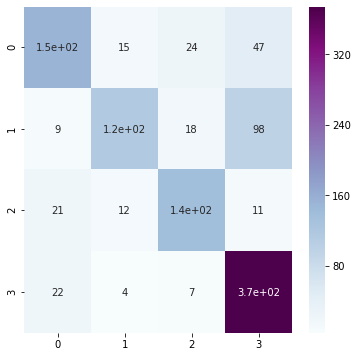

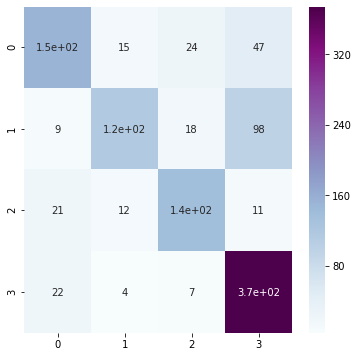

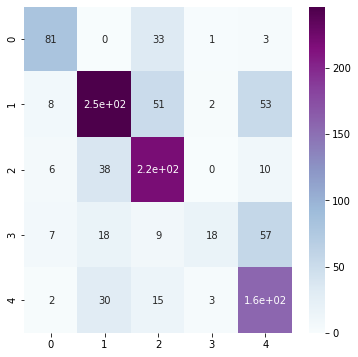

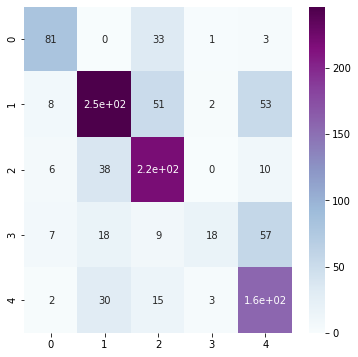

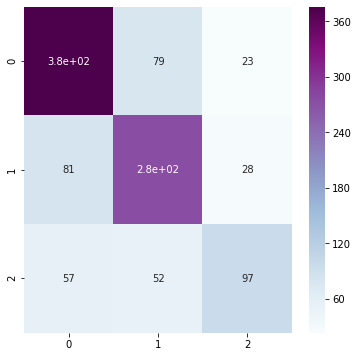

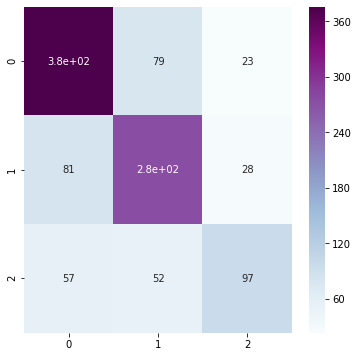

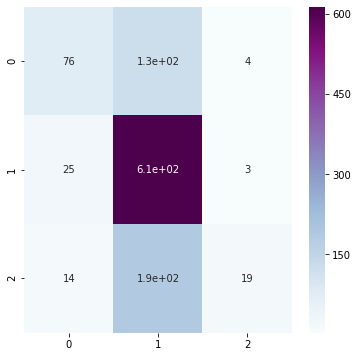

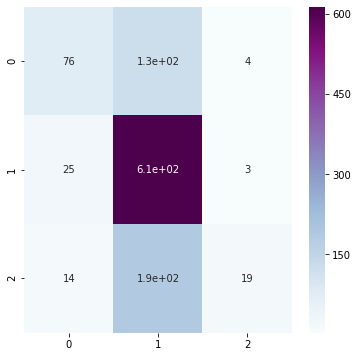

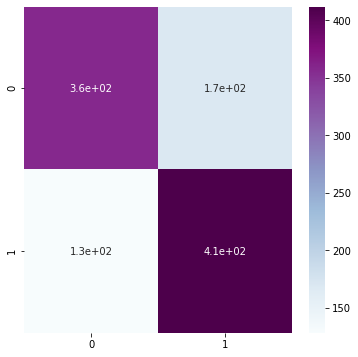

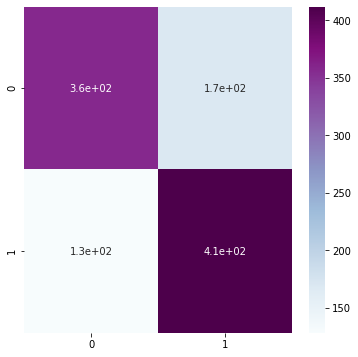

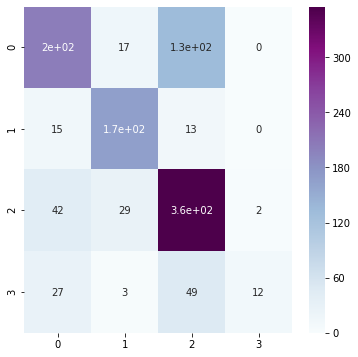

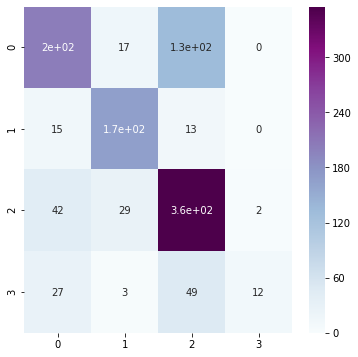

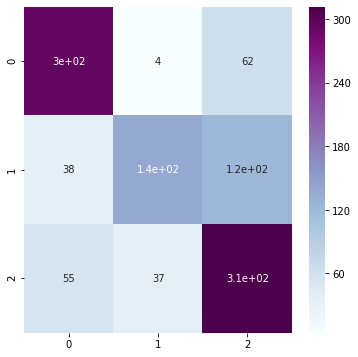

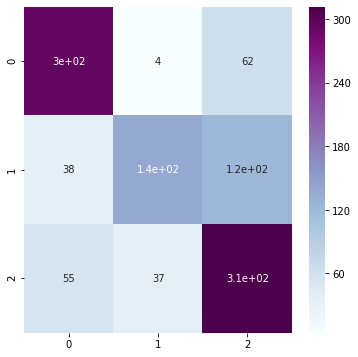

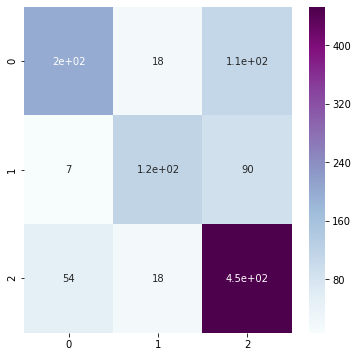

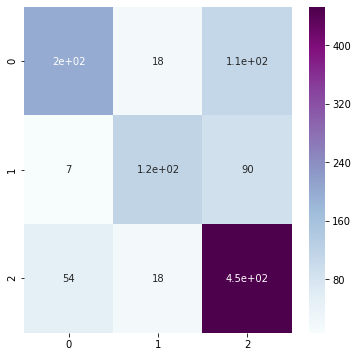

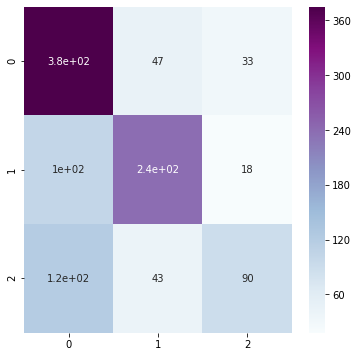

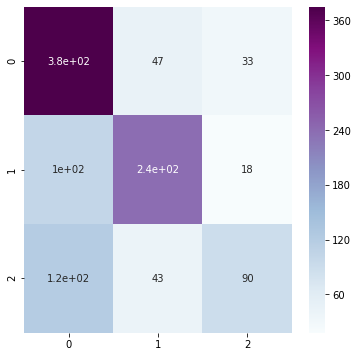

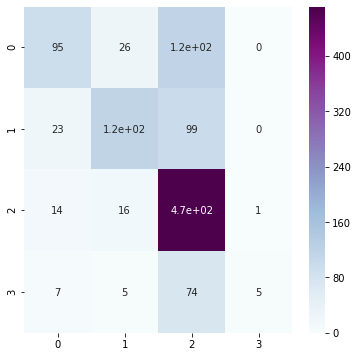

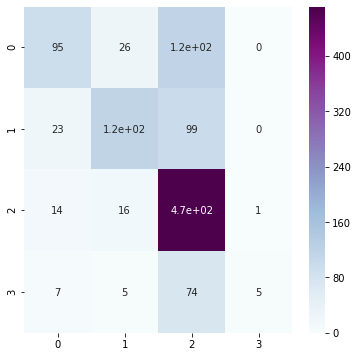

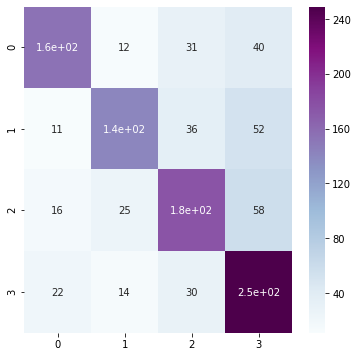

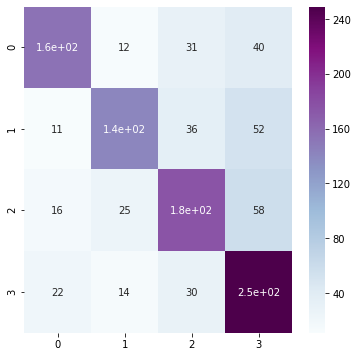

In [115]:
#separate train and test data
train_x, test_x, train_y, test_y=train_test_split(data_csv,label_csv,test_size=0.2,random_state=0)
columns_list = train_y.columns
for column in columns_list:
    specific_train_y = train_y.loc[:, column]
    specific_test_y = test_y.loc[:, column]
    print(specific_train_y)
    print(specific_test_y)
    #学習
    clf = RandomForestClassifier(random_state=0,min_samples_leaf=5,n_estimators=100)
    clf = clf.fit(train_x, specific_train_y.values.ravel())
    #評価
    pred_train1=clf.predict(train_x)
    pred1 = clf.predict(test_x)
    print("test:",accuracy_score(pred1, specific_test_y))
    print("train:",accuracy_score(pred_train1, specific_train_y))
    #correct answers
    CM=confusion_matrix(specific_test_y, clf.predict(test_x)) 
    print(CM)
    #ヒートマップ化 
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.heatmap(CM,annot=True,cmap='BuPu')
    ax.set_ylim(len(CM), 0)
    #ヒートマップ化 
    fig, ax = plt.subplots(figsize=(6, 6))
    svm=sns.heatmap(CM,annot=True,cmap='BuPu')
    ax.set_ylim(len(CM), 0)
    figure = svm.get_figure()    
    figure.savefig(specific_test_y.name+'.png', dpi=400)
    #重要度の確認
    train_x=pd.DataFrame(train_x)
    importance = pd.DataFrame({ 'variables' :train_x.columns, 'importance' :clf.feature_importances_}) 
    importance = importance.sort_values('importance',ascending=False) 
    importance = importance.reset_index(drop=True)
    importance.index = np.arange(1, len(importance) + 1)
    importance.to_csv("sub1_"+specific_test_y.name+"_importance.csv")
    importance